In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cluster import KMeans
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
sampleData = pd.read_csv("/home/part-00000",  names = ['date', 'longitude', 'latitude', 'baseLLC'])

In [ ]:
columns = ['longitude', 'latitude']
featuresData = pd.DataFrame(sampleData, columns=columns)

In [ ]:
### combine feature matrix `X` before entering it into the algorithm.
f1 = featuresData['longitude'].values
f2 = featuresData['latitude'].values
X=np.matrix(zip(f1,f2))
X=X[:10000]

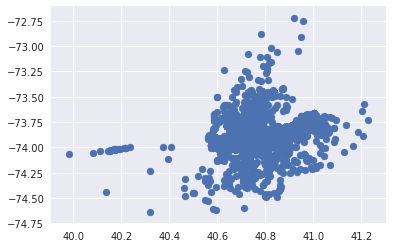

In [ ]:
## scatter plot with above features
plt.scatter(f1,f2)
plt.show()

In [ ]:
K = range(1,20)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

In [ ]:
## sum of squared error
from scipy.spatial.distance import cdist, pdist

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
#cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
sumWithinSS = [sum(d) for d in dist]

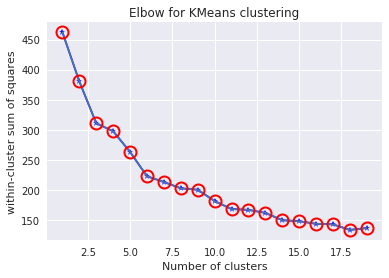

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, sumWithinSS, 'b*-')
ax.plot(K, sumWithinSS, marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

In [ ]:
sumWithinSS

[462.25215522803808,
 380.36029667905461,
 310.85264770110723,
 297.5211824507478,
 263.09253035686856,
 222.64054780647928,
 213.08944711413565,
 202.5259322260784,
 200.20800266409708,
 181.30389031257121,
 168.06658137779974,
 166.67715411500092,
 161.7025171941612,
 149.43067250432264,
 147.86004933735896,
 143.48377274197122,
 142.6022511531105,
 133.3256906273447,
 136.46598664335522]